In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture

In [2]:
data = pd.read_csv("files/AMS/context_data_norm.csv", index_col=0)

In [3]:
bic = pd.DataFrame(columns=['n', 'bic', 'run'])
ix = 0

n_components_range = range(2, 40, 4)
gmmruns = 3

In [4]:
sample = data
for n_components in n_components_range:
    for i in range(gmmruns):
        gmm = GaussianMixture(n_components=n_components, covariance_type="full", max_iter=200, n_init=1, verbose=1)
        fitted = gmm.fit(sample)
        bicnum = gmm.bic(data)
        bic.loc[ix] = [n_components, bicnum, i]
        ix += 1

        print(n_components, i, "BIC:", bicnum)

Initialization 0
  Iteration 10
  Iteration 20
Initialization converged: True
2 0 BIC: 76807043.80989268
Initialization 0
  Iteration 10
  Iteration 20
Initialization converged: True
2 1 BIC: 76807043.80989268
Initialization 0
  Iteration 10
  Iteration 20
Initialization converged: True
2 2 BIC: 76807043.80989268
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
  Iteration 90
Initialization converged: True
6 0 BIC: 41440760.15448191
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
  Iteration 90
  Iteration 100
  Iteration 110
  Iteration 120
  Iteration 130
  Iteration 140
  Iteration 150
  Iteration 160
  Iteration 170
Initialization converged: True
6 1 BIC: 41501015.00156503
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80


/home/arch_ubuntu/miniconda/envs/momepy_env/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


10 2 BIC: 34529048.69397968
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
Initialization converged: True
14 0 BIC: 28336177.05292836
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
Initialization converged: True
14 1 BIC: 27706078.00973992
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
Initialization converged: True
14 2 BIC: 28558045.850696363
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
Initialization converged: True
18 0 BIC: 25813383.971470203
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
Initialization converged: True
18 1 BIC: 25096119.30406069
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
Ini

In [5]:
bic.to_csv('files/AMS/complete_BIC.csv')

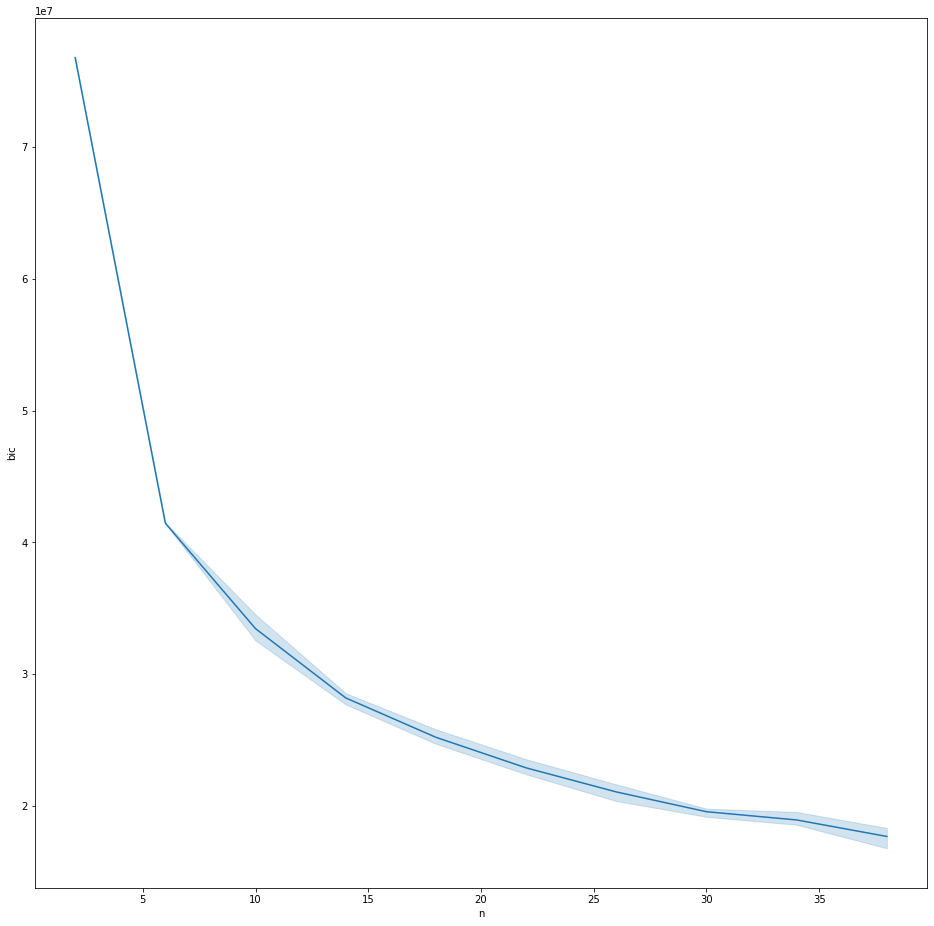

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 16))
sns.lineplot(ax=ax, x='n', y='bic', data=bic)

In [7]:
gradients = []

group = bic.groupby('n').mean()
group['gradient'] = np.gradient(group.bic)

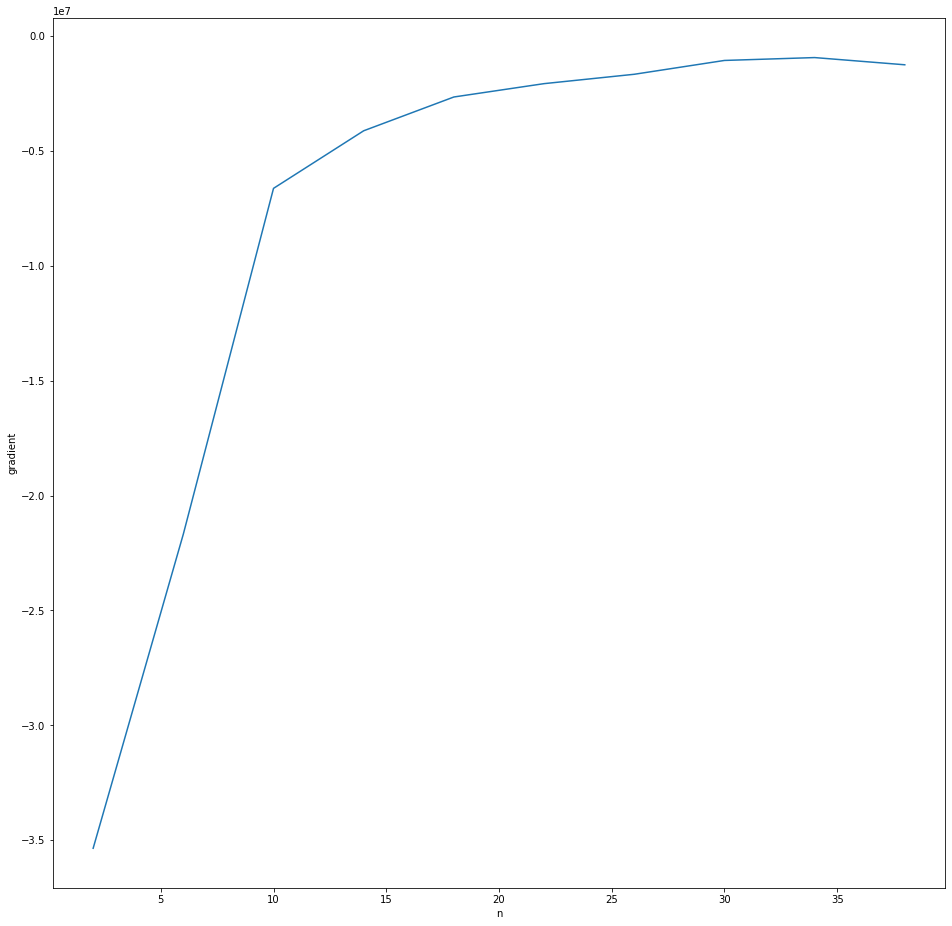

In [8]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.lineplot(ax=ax, x='n', y='gradient', data=group.reset_index())

In [9]:
data["cluster38"] = gmm.predict(data)

In [10]:
data.reset_index()[['uID', 'cluster38']].to_csv("files/AMS/200309_clusters_trial_complete_n38.csv")